# What are we trying to solve?

The problem our group decided to tackle was seperating spam messages from non-spam messages which we call ham. We believe this is a worthwhile effort because it has some real world applications, just think of how emails have a spam filter automatically set up to sort all the junk mail you recieve. 

# Collect Data

The data set was collected from kaggle here: https://www.kaggle.com/uciml/sms-spam-collection-dataset

Our data set has just over 5500 text messages, all of which are obtained from real texts that have been sent. 

# Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict
from tqdm import tqdm
import matplotlib as mpl
import math
df = pd.read_csv('C:/Users/User/Desktop/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)

In [3]:
df = df.rename(columns = {'v1': 'Class','v2': 'Text'})
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.size

11144

In [5]:
df.groupby('Class').describe()

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [6]:
count = [0,0]
for item in df.Class:
    if item == 'ham':
        count[1] = count[1] + 1
    else:
        count[0] = count[0] + 1

print(count)

[747, 4825]


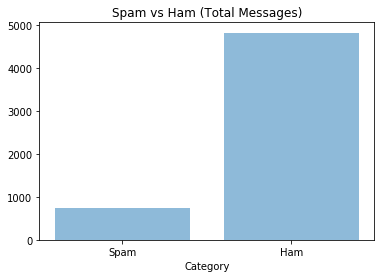

In [7]:
categories = ('Spam', 'Ham')
y_pos = np.arange(len(categories))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.xlabel('Category')
plt.title('Spam vs Ham (Total Messages)')
plt.show()

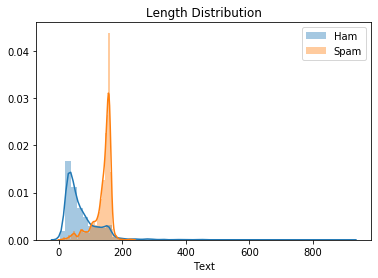

In [8]:
s1 = df[df['Class'] == 'ham']['Text'].str.len()
sns.distplot(s1, label='Ham')
s2 = df[df['Class'] == 'spam']['Text'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Length Distribution')
plt.legend()

### Add length as a feature

In [9]:
df['Length'] = df['Text'].apply(len)
df.head()

,Class,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E688994C8>,
      dtype=object)

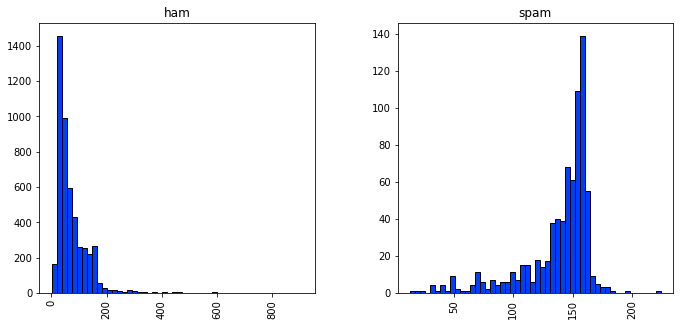

In [10]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df.hist(column='Length', by='Class', bins=50,figsize=(11,5))

In [11]:
hamcount, spamcount = defaultdict(int), defaultdict(int)

In [12]:
row = next(df.iterrows())[0]

In [13]:
for row in df.iterrows():
        if row[1].Class == 'ham':
            hamlist = re.split("[^A-Za-z0-9\-\']", row[1].Text)
            for word in hamlist:
                hamcount[word]+=1
        else:
            spamlist = re.split("[^A-Za-z0-9\-\']", row[1].Text)
            for word in spamlist:
                spamcount[word]+=1
                    

In [14]:
hamcountsorted = sorted(hamcount.items(), key=lambda x: x[1], reverse=True)
hamcountsorted

[('', 17634),
 ('you', 1643),
 ('to', 1540),
 ('I', 1499),
 ('the', 1023),
 ('a', 973),
 ('i', 818),
 ('in', 764),
 ('and', 748),
 ('u', 725),
 ('me', 716),
 ('is', 658),
 ('my', 626),
 ('it', 538),
 ('of', 504),
 ('for', 480),
 ('that', 448),
 ('your', 375),
 ('on', 365),
 ('not', 351),
 ('have', 350),
 ('at', 339),
 ('are', 325),
 ('be', 319),
 ('2', 319),
 ('gt', 318),
 ('lt', 316),
 ('so', 303),
 ('will', 300),
 ('can', 297),
 ('but', 292),
 ('get', 291),
 ("I'm", 281),
 ('do', 274),
 ('U', 272),
 ('now', 266),
 ('up', 261),
 ('with', 251),
 ('when', 234),
 ('go', 233),
 ('know', 230),
 ('if', 224),
 ('like', 220),
 ('we', 212),
 ('call', 209),
 ('come', 209),
 ('out', 205),
 ('all', 204),
 ('got', 203),
 ('this', 198),
 ('or', 196),
 ('just', 196),
 ('was', 192),
 ('You', 191),
 ('ur', 187),
 ('am', 183),
 ('4', 179),
 ('day', 178),
 ('-', 177),
 ('time', 176),
 ('then', 175),
 ('there', 172),
 ('lor', 162),
 ('home', 160),
 ('about', 153),
 ('going', 153),
 ('want', 152),
 ('good

In [15]:
spamcountsorted = sorted(spamcount.items(), key=lambda x: x[1], reverse=True)
spamcountsorted

[('', 3655),
 ('to', 608),
 ('a', 358),
 ('2', 203),
 ('you', 187),
 ('call', 187),
 ('your', 187),
 ('or', 185),
 ('the', 178),
 ('for', 171),
 ('is', 149),
 ('now', 138),
 ('Call', 138),
 ('on', 138),
 ('4', 131),
 ('have', 128),
 ('and', 119),
 ('FREE', 116),
 ('from', 116),
 ('1', 110),
 ('ur', 107),
 ('with', 102),
 ('www', 96),
 ('mobile', 95),
 ('of', 95),
 ('U', 93),
 ('claim', 78),
 ('You', 78),
 ('are', 77),
 ('our', 76),
 ('txt', 75),
 ('To', 75),
 ('Txt', 75),
 ('text', 75),
 ('prize', 74),
 ('Your', 72),
 ('150p', 70),
 ('in', 68),
 ('u', 68),
 ('only', 63),
 ('T', 62),
 ('free', 62),
 ('STOP', 62),
 ('reply', 58),
 ('50', 56),
 ('-', 56),
 ('contact', 56),
 ('week', 53),
 ('com', 52),
 ('uk', 52),
 ('16', 51),
 ('18', 51),
 ('be', 50),
 ('service', 50),
 ('won', 49),
 ('co', 49),
 ('who', 48),
 ('send', 47),
 ('out', 47),
 ('just', 47),
 ('stop', 47),
 ('Nokia', 47),
 ('per', 46),
 ('this', 46),
 ('3', 45),
 ('get', 45),
 ('NOW', 45),
 ('Reply', 44),
 ('500', 44),
 ('Cs',

In [16]:
print(hamcountsorted.pop(0))
print(spamcountsorted.pop(0))

('', 17634)
('', 3655)


In [17]:
len(hamcountsorted)

8717

In [18]:
len(spamcountsorted)

3588

In [19]:
hamtotal = 0
for item in hamcountsorted:
    hamtotal += item[1]
    
print(hamtotal)

69114


In [20]:
spamtotal = 0
for item in spamcountsorted:
    spamtotal += item[1]
    
print(spamtotal)

18755


<BarContainer object of 10 artists>

<Figure size 432x288 with 0 Axes>

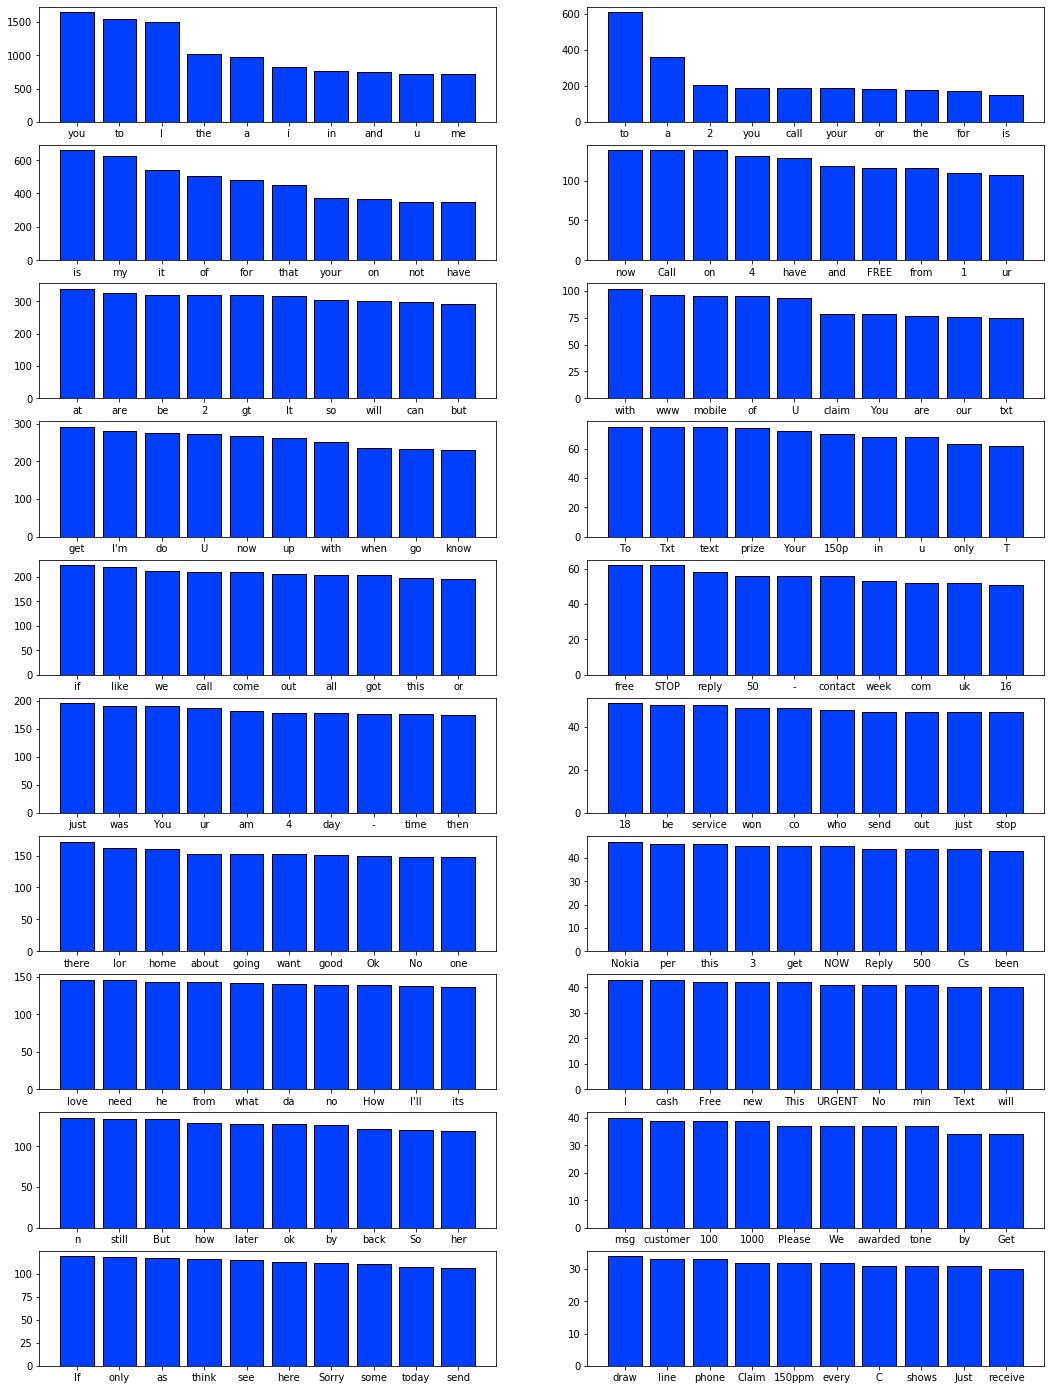

In [21]:
plt.figure(1)
plt.figure(figsize=(18,25))
ax1 = plt.subplot(10,2,1)
plt.bar(*zip(*hamcountsorted[0:10]))
ax2 = plt.subplot(10,2,2)
plt.bar(*zip(*spamcountsorted[0:10]))
ax3 = plt.subplot(10,2,3)
plt.bar(*zip(*hamcountsorted[10:20]))
ax4 = plt.subplot(10,2,4)
plt.bar(*zip(*spamcountsorted[10:20]))
ax5 = plt.subplot(10,2,5)
plt.bar(*zip(*hamcountsorted[20:30]))
ax6 = plt.subplot(10,2,6)
plt.bar(*zip(*spamcountsorted[20:30]))
ax7 = plt.subplot(10,2,7)
plt.bar(*zip(*hamcountsorted[30:40]))
ax8 = plt.subplot(10,2,8)
plt.bar(*zip(*spamcountsorted[30:40]))
ax9 = plt.subplot(10,2,9)
plt.bar(*zip(*hamcountsorted[40:50]))
ax10 = plt.subplot(10,2,10)
plt.bar(*zip(*spamcountsorted[40:50]))
ax11 = plt.subplot(10,2,11)
plt.bar(*zip(*hamcountsorted[50:60]))
ax12 = plt.subplot(10,2,12)
plt.bar(*zip(*spamcountsorted[50:60]))
ax13 = plt.subplot(10,2,13)
plt.bar(*zip(*hamcountsorted[60:70]))
ax14 = plt.subplot(10,2,14)
plt.bar(*zip(*spamcountsorted[60:70]))
ax15 = plt.subplot(10,2,15)
plt.bar(*zip(*hamcountsorted[70:80]))
ax16 = plt.subplot(10,2,16)
plt.bar(*zip(*spamcountsorted[70:80]))
ax17 = plt.subplot(10,2,17)
plt.bar(*zip(*hamcountsorted[80:90]))
ax18 = plt.subplot(10,2,18)
plt.bar(*zip(*spamcountsorted[80:90]))
ax19 = plt.subplot(10,2,19)
plt.bar(*zip(*hamcountsorted[90:100]))
ax20 = plt.subplot(10,2,20)
plt.bar(*zip(*spamcountsorted[90:100]))

In [22]:
common = []
for i in range(8717):
    check = hamcountsorted[i][0]
    for j in range(3588):
        if check == spamcountsorted[j][0]:
            common.append(check)
            
print(common[0:100])

['you', 'to', 'I', 'the', 'a', 'i', 'in', 'and', 'u', 'me', 'is', 'my', 'it', 'of', 'for', 'that', 'your', 'on', 'not', 'have', 'at', 'are', 'be', '2', 'so', 'will', 'can', 'but', 'get', "I'm", 'do', 'U', 'now', 'up', 'with', 'when', 'go', 'know', 'if', 'like', 'we', 'call', 'come', 'out', 'all', 'got', 'this', 'or', 'just', 'was', 'You', 'ur', 'am', '4', 'day', '-', 'time', 'then', 'there', 'home', 'about', 'going', 'want', 'good', 'No', 'one', 'love', 'need', 'from', 'what', 'no', 'How', 'its', 'n', 'still', 'how', 'ok', 'by', 'back', 'So', 'her', 'If', 'only', 'as', 'think', 'see', 'here', 'Sorry', 'some', 'today', 'send', 'him', "don't", 'much', 'What', 'too', 'Do', 'r', 'My', 'take']


In [23]:
len(common)

1199

In [24]:
indices, hamindices, spamindices = [], [], []

for item in common:
    for i in range(8717):
        if hamcountsorted[i][0] == item:
            num1 = hamcountsorted[i][1]
            break
    for i in range(3588):
        if spamcountsorted[i][0] == item:
            num2 = (spamcountsorted[i][1])
            break
    indices.append((num1,num2))
    hamindices.append(num1)
    spamindices.append(num2)
print(indices[0:100])

[(1643, 187), (1540, 608), (1499, 43), (1023, 178), (973, 358), (818, 7), (764, 68), (748, 119), (725, 68), (716, 29), (658, 149), (626, 10), (538, 24), (504, 95), (480, 171), (448, 23), (375, 187), (365, 138), (351, 21), (350, 128), (339, 26), (325, 77), (319, 50), (319, 203), (303, 24), (300, 40), (297, 25), (292, 7), (291, 45), (281, 8), (274, 12), (272, 93), (266, 138), (261, 19), (251, 102), (234, 9), (233, 16), (230, 25), (224, 17), (220, 13), (212, 12), (209, 187), (209, 1), (205, 47), (204, 25), (203, 4), (198, 46), (196, 185), (196, 47), (192, 9), (191, 78), (187, 107), (183, 10), (179, 131), (178, 11), (177, 56), (176, 19), (175, 8), (172, 11), (160, 1), (153, 7), (153, 1), (152, 17), (151, 4), (148, 41), (148, 5), (146, 6), (145, 7), (143, 116), (141, 13), (139, 19), (139, 5), (136, 4), (135, 10), (134, 7), (129, 3), (127, 3), (126, 34), (121, 21), (120, 2), (119, 12), (119, 14), (118, 63), (117, 21), (116, 2), (115, 9), (113, 5), (111, 3), (110, 6), (107, 14), (106, 47), (1

In [25]:
wordswithcounts = list(zip(common, indices))
hamwithcounts = list(zip(common, hamindices))
spamwithcounts = list(zip(common, spamindices))

In [26]:
print(wordswithcounts[0:100])

[('you', (1643, 187)), ('to', (1540, 608)), ('I', (1499, 43)), ('the', (1023, 178)), ('a', (973, 358)), ('i', (818, 7)), ('in', (764, 68)), ('and', (748, 119)), ('u', (725, 68)), ('me', (716, 29)), ('is', (658, 149)), ('my', (626, 10)), ('it', (538, 24)), ('of', (504, 95)), ('for', (480, 171)), ('that', (448, 23)), ('your', (375, 187)), ('on', (365, 138)), ('not', (351, 21)), ('have', (350, 128)), ('at', (339, 26)), ('are', (325, 77)), ('be', (319, 50)), ('2', (319, 203)), ('so', (303, 24)), ('will', (300, 40)), ('can', (297, 25)), ('but', (292, 7)), ('get', (291, 45)), ("I'm", (281, 8)), ('do', (274, 12)), ('U', (272, 93)), ('now', (266, 138)), ('up', (261, 19)), ('with', (251, 102)), ('when', (234, 9)), ('go', (233, 16)), ('know', (230, 25)), ('if', (224, 17)), ('like', (220, 13)), ('we', (212, 12)), ('call', (209, 187)), ('come', (209, 1)), ('out', (205, 47)), ('all', (204, 25)), ('got', (203, 4)), ('this', (198, 46)), ('or', (196, 185)), ('just', (196, 47)), ('was', (192, 9)), ('Yo

In [27]:
hampercentscopy = hamwithcounts.copy()
hamwords, hampercents = zip(*hampercentscopy)
hampercents = list(hampercents)

spampercentscopy = spamwithcounts.copy()
spamwords, spampercents = zip(*spampercentscopy)
spampercents = list(spampercents)

In [28]:
for i in range(len(hampercents)):
    hampercents[i] = hampercents[i] / hamtotal
print(hampercents)

[0.02377231819891773, 0.02228202679630755, 0.021688804004977285, 0.014801632086118587, 0.014078189657667044, 0.011835518129467258, 0.01105420030673959, 0.010822698729635096, 0.010489915212547385, 0.010359695575426108, 0.009520502358422316, 0.009057499204213329, 0.007784240530138611, 0.0072922996787915615, 0.00694504731313482, 0.006482044158925833, 0.005425818213386579, 0.00528112972769627, 0.005078565847729838, 0.005064096999160807, 0.004904939664901467, 0.0047023757849350345, 0.004615562693520849, 0.004615562693520849, 0.004384061116416356, 0.004340654570709263, 0.0042972480250021705, 0.004224903782157016, 0.0042104349335879854, 0.004065746447897677, 0.0039644645079144605, 0.003935526810776398, 0.003848713719362213, 0.003776369476517059, 0.00363168099082675, 0.003385710565153225, 0.0033712417165841944, 0.0033278351708771014, 0.0032410220794629164, 0.0031831466851867927, 0.003067395896634546, 0.0030239893509274533, 0.0030239893509274533, 0.0029661139566513296, 0.002951645108082299, 0.0

In [29]:
for i in range(len(spampercents)):
    spampercents[i] = spampercents[i] / spamtotal
print(spampercents)

[0.00997067448680352, 0.03241802186083711, 0.0022927219408157827, 0.009490802452679286, 0.019088243135163958, 0.0003732338043188483, 0.003625699813383098, 0.006344974673420422, 0.003625699813383098, 0.0015462543321780858, 0.0079445481205012, 0.0005331911490269261, 0.0012796587576646228, 0.005065315915755798, 0.009117568648360438, 0.0012263396427619302, 0.00997067448680352, 0.007358037856571581, 0.001119701412956545, 0.006824846707544655, 0.001386296987470008, 0.004105571847507331, 0.002665955745134631, 0.0108237803252466, 0.0012796587576646228, 0.0021327645961077045, 0.0013329778725673154, 0.0003732338043188483, 0.0023993601706211675, 0.0004265529192215409, 0.0006398293788323114, 0.0049586776859504135, 0.007358037856571581, 0.0010130631831511596, 0.005438549720074647, 0.00047987203412423355, 0.0008531058384430818, 0.0013329778725673154, 0.0009064249533457745, 0.000693148493735004, 0.0006398293788323114, 0.00997067448680352, 5.3319114902692615e-05, 0.0025059984004265528, 0.0013329778725

In [30]:
hampercentszipped = list(zip(common, hampercents))
spampercentszipped = list(zip(common, spampercents))

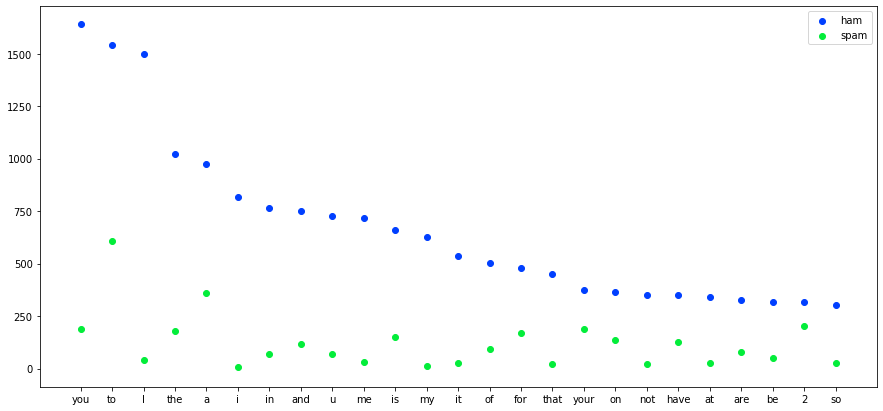

In [31]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)

ax1.scatter(*zip(*hamwithcounts[0:25]), label='ham')
ax1.scatter(*zip(*spamwithcounts[0:25]), label='spam')
plt.legend(loc='upper right');
plt.show()

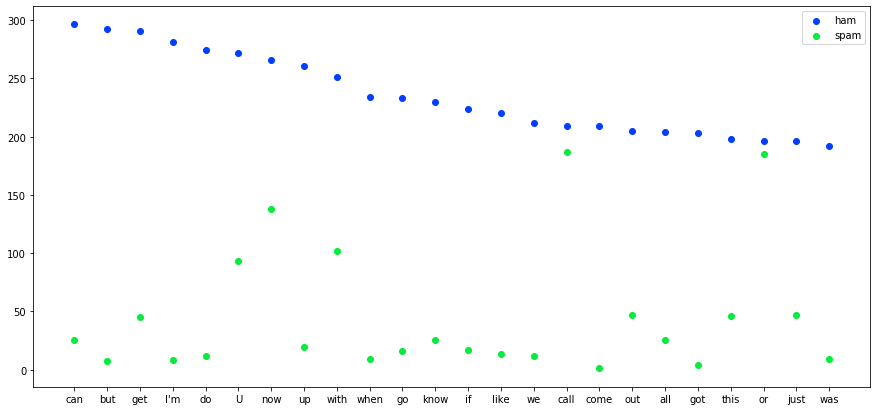

In [32]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)

ax1.scatter(*zip(*hamwithcounts[26:50]), label='ham')
ax1.scatter(*zip(*spamwithcounts[26:50]), label='spam')
plt.legend(loc='upper right');
plt.show()

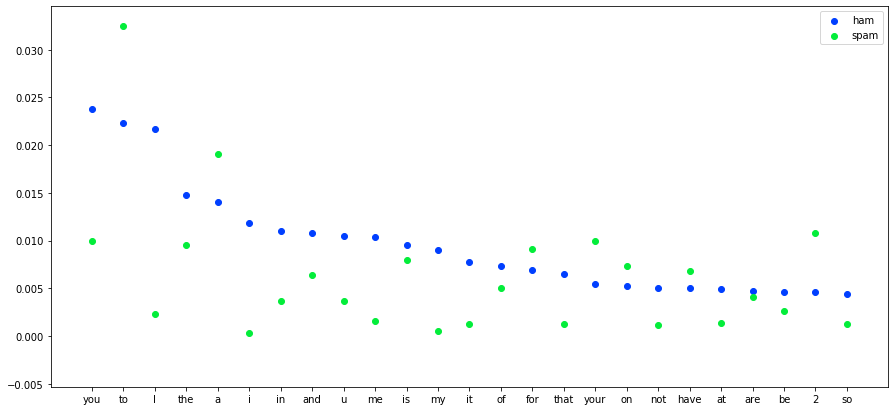

In [33]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)

ax1.scatter(*zip(*hampercentszipped[0:25]), label='ham')
ax1.scatter(*zip(*spampercentszipped[0:25]), label='spam')
plt.legend(loc='upper right');

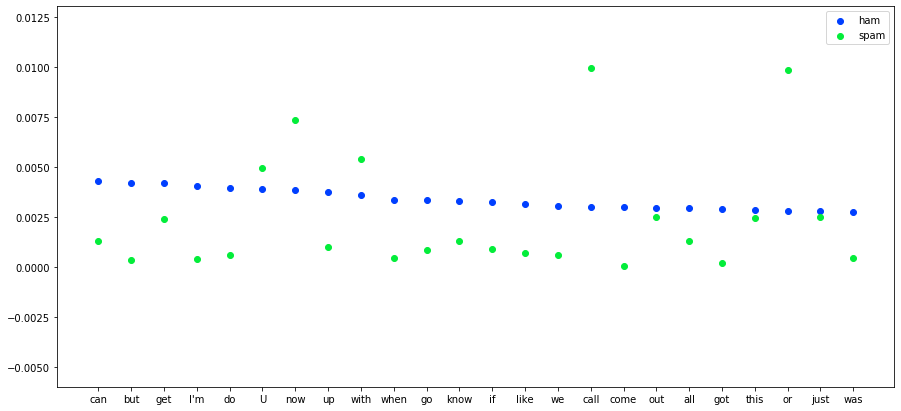

In [34]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)

ax1.scatter(*zip(*hampercentszipped[26:50]), label='ham')
ax1.scatter(*zip(*spampercentszipped[26:50]), label='spam')
plt.legend(loc='upper right');

# Establish Baseline
Our baseline is determined by finding the average length of all of the texts in the data set. We found that the average length is about 80. Looking at the length distributions from before, typically longer texts are spam. If the length of a text is longer than 80 words, we predict spam, and otherwise we predict ham.

In [35]:
count = 0
length = 0

for row in df.iterrows():
    length+= row[1].Length
    count+=1

In [36]:
print(length)
print(count)
print(math.floor(length/count))

446422
5572
80


In [37]:
correct = 0
for row in df.iterrows():
    if row[1].Length > 80 and row[1].Class == 'spam':
        correct+=1
    elif row[1].Length <= 80 and row[1].Class == 'ham':
        correct+=1
        
print(correct)
print('Baseline Accuracy: ', (correct/count)*100)

4056
Baseline Accuracy:  72.79253409906676


# Train and Select Model

### -Set up TFIDF and Count Vectorizor

In [38]:
text_features = df['Text'].copy()

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
#fuction for removing punctuation and stopwords
import string

def remove_punc_and_stopwords(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [41]:
features_with_stopwords = text_features.apply(remove_punc_and_stopwords)

In [42]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [43]:
features_with_stopwords

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3                     U dun say early hor U c already say
4             Nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u U å£750 Pound prize...
5568                          Ì b going esplanade fr home
5569                          Pity mood Soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       Rofl true name
Name: Text, Length: 5572, dtype: object

##### TFIDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer("english")
TFIDF_feats = vectorizer.fit_transform(features_with_stopwords)
print(TFIDF_feats)

  (0, 8871)	0.19696340342726038
  (0, 1168)	0.3454453072521403
  (0, 3821)	0.16228382867264401
  (0, 2198)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 4809)	0.2918335915067389
  (0, 9107)	0.23822187576133733
  (0, 3861)	0.19227005405586492
  (0, 1864)	0.2918335915067389
  (0, 1401)	0.2626832171423389
  (0, 2482)	0.26752361109476797
  (0, 6381)	0.2701917502132373
  (0, 4652)	0.3454453072521403
  (0, 3764)	0.15705625796538664
  (1, 5978)	0.5462557824449175
  (1, 9003)	0.4313385731102942
  (1, 4620)	0.5233273701797004
  (1, 4848)	0.4080505634471753
  (1, 5946)	0.2741803362458879
  (2, 71)	0.23298968636017275
  (2, 1254)	0.16831155329741232
  (2, 6721)	0.23298968636017275
  (2, 8521)	0.1252035413992088
  (2, 6669)	0.23298968636017275
  (2, 6777)	0.1658630343061897
  :	:
  (5568, 3169)	0.6457639024659789
  (5568, 3543)	0.5628210076825846
  (5568, 3783)	0.3636095248537397
  (5568, 4156)	0.3660732290385455
  (5569, 7922)	0.520467167163554
  (5569, 7547)	0.520467167163554
  (5569, 

In [45]:
#TFIDF without removing stopwords
vectorizer = TfidfVectorizer("english")
TFIDF_feats2 = vectorizer.fit_transform(text_features)
print(TFIDF_feats2)

  (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147
  (1, 5533)	0.5465881710238072
  (1, 8392)	0.4316010362639011
  (1, 4318)	0.5236458071582338
  (1, 4512)	0.4082988561907181
  (1, 5504)	0.27211951321382544
  (2, 77)	0.23012628226525952
  (2, 1156)	0.16541257593676326
  :	:
  (5570, 1786)	0.2829205787072918
  (5570, 3470)	0.2752778321471703
  (5570, 2892)	0.24400995680638932
  (5570, 7049)	0.20534386872930602
  (5570, 1778)	0.1366456751602606
  (5570, 8065)	0.20880862098597563
  

##### Count Vectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
CV_feats = vectorizer.fit_transform(text_features)
print(CV_feats.shape)
print(CV_feats.toarray())

(5572, 8672)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(vectorizer.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [48]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

CV_feats2 = vectorizer2.fit_transform(text_features)
print(CV_feats2.shape)
print(CV_feats2.toarray())

(5572, 41654)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
print(vectorizer2.get_feature_names())

['00 in', '00 per', '00 sub', '00 subs', '000 bonus', '000 cash', '000 homeowners', '000 pounds', '000 price', '000 prize', '000 xmas', '000pes so', '008704050406 sp', '0089 my', '0121 2025050', '01223585236 xx', '01223585334 to', '0125698789 ring', '02 06', '02 09', '02 claimcode', '02 user', '0207 083', '0207 153', '02072069400 bx', '02073162414 now', '02085076972 reply', '021 3680', '03 05', '03 is', '03 our', '03 this', '04 call', '0430 jul', '05 05', '05 or', '050703 csbcm4235wc1n3xx', '0578 now', '06 03', '06 05', '06 11', '06 good', '07 11', '07046744435 now', '07090298926 to', '07099833605 to', '07123456789 to', '0721072 to', '07732584351 rodger', '07734396839 ibh', '07742676969 shows', '07753741225 shows', '0776xxxxxxx ve', '07781482378 com', '077xxx won', '07801543489 are', '07808 xxxxxx', '07808247860 shows', '07808726822 was', '07815296484 shows', '078498 shows', '0789xxxxxxx today', '07946746291 07880867867', '0796xxxxxx today', '07973788240 shows', '07xxxxxxxxx shows', '0

##### Split Each into it's own Train, Test and Validation Sets

In [50]:
from sklearn.model_selection import train_test_split

#get train and test sets for TFIDF
X_train, X_test, y_train, y_test = train_test_split(TFIDF_feats, df['Class'], test_size=.2, random_state=1)

#do it again for validation sets, use .25 because .25 x .8 = .2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=1) 

In [51]:
print('X_train:',X_train.shape)
print('y_train:',len(y_train))
print('X_test: ',X_test.shape)
print('y_test: ',len(y_test))
print('X_val:  ',X_val.shape)
print('y_val:  ',len(y_val))

X_train: (3342, 9376)
y_train: 3342
X_test:  (1115, 9376)
y_test:  1115
X_val:   (1115, 9376)
y_val:   1115


In [52]:
#get train and test sets for TFIDF without removing stopwords
X_train4, X_test4, y_train4, y_test4 = train_test_split(TFIDF_feats2, df['Class'], test_size=.2, random_state=1)

#do it again for validation sets, use .25 because .25 x .8 = .2
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=.25, random_state=1) 

In [53]:
print('X_train4:',X_train4.shape)
print('y_train4:',len(y_train4))
print('X_test4: ',X_test4.shape)
print('y_test4: ',len(y_test4))
print('X_val4:  ',X_val4.shape)
print('y_val4:  ',len(y_val4))

X_train4: (3342, 8672)
y_train4: 3342
X_test4:  (1115, 8672)
y_test4:  1115
X_val4:   (1115, 8672)
y_val4:   1115


In [54]:
#get train and test sets for CV
X_train2, X_test2, y_train2, y_test2 = train_test_split(CV_feats, df['Class'], test_size=.2, random_state=1)

#do it again for validation sets, use .25 because .25 x .8 = .2
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=.25, random_state=1) 

In [55]:
print('X_train2:',X_train2.shape)
print('y_train2:',len(y_train2))
print('X_test2: ',X_test2.shape)
print('y_test2: ',len(y_test2))
print('X_val2:  ',X_val2.shape)
print('y_val2:  ',len(y_val2))

X_train2: (3342, 8672)
y_train2: 3342
X_test2:  (1115, 8672)
y_test2:  1115
X_val2:   (1115, 8672)
y_val2:   1115


In [56]:
#get train and test sets for CV2 (ngrams = 2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(CV_feats2, df['Class'], test_size=.2, random_state=1)

#do it again for validation sets, use .25 because .25 x .8 = .2
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=.25, random_state=1) 

In [57]:
print('X_train3:',X_train3.shape)
print('y_train3:',len(y_train3))
print('X_test3: ',X_test3.shape)
print('y_test3: ',len(y_test3))
print('X_val3:  ',X_val3.shape)
print('y_val3:  ',len(y_val3))

X_train3: (3342, 41654)
y_train3: 3342
X_test3:  (1115, 41654)
y_test3:  1115
X_val3:   (1115, 41654)
y_val3:   1115


#### Classifiers

In [58]:
# Importing a ton of different classifiers

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
#set up classifiers

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=1)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=1)
abc = AdaBoostClassifier(n_estimators=62, random_state=1)
bc = BaggingClassifier(n_estimators=9, random_state=1)
etc = ExtraTreesClassifier(n_estimators=9, random_state=1)

All the parameters above are based on this hyperparameter article:
https://www.kaggle.com/muzzzdy/spam-detection-classifiers-hyperparameter-tuning. We used this article as a base and experimented from there.

In [60]:
classifiers = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [61]:
# Set up methods to classify and predict

def train_classifier(classifier, feat_train, labels_train):    
    classifier.fit(feat_train, labels_train)
    
def predict(classifier, features):
    return (classifier.predict(features))    

##### TFIDF with Stopwords

In [62]:
#Loop through classifiers and save results in prediction_scores for TFIDF with stopwords

prediction_scores = []
for k,v in classifiers.items():
    train_classifier(v, X_train, y_train)
    pred = predict(v, X_test)
    prediction_scores.append((k, [accuracy_score(y_test,pred)]))

In [63]:
TFIDF_scores = pd.DataFrame.from_items(prediction_scores, orient='index', columns=['Test Scores'])
TFIDF_scores

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Test Scores
SVC,0.976682
KN,0.942601
NB,0.977578
DT,0.951570
LR,0.950673
RF,0.976682
AdaBoost,0.967713
BgC,0.961435
ETC,0.975785


###### TFIDF Without Stopwords Removed

In [64]:
prediction_scores4 = []
for k,v in classifiers.items():
    train_classifier(v, X_train4, y_train4)
    pred4 = predict(v, X_test4)
    prediction_scores4.append((k, [accuracy_score(y_test4,pred4)]))

In [65]:
TFIDF_scores2 = pd.DataFrame.from_items(prediction_scores4, orient='index', columns=['Test Scores'])
TFIDF_scores2

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Test Scores
SVC,0.983857
KN,0.961435
NB,0.983857
DT,0.969507
LR,0.969507
RF,0.982063
AdaBoost,0.980269
BgC,0.978475
ETC,0.982063


##### Count Vectorizor

In [66]:
#Loop through classifiers and save results in prediction_scores
prediction_scores2 = []
for k,v in classifiers.items():
    train_classifier(v, X_train2, y_train2)
    pred2 = predict(v, X_test2)
    prediction_scores2.append((k, [accuracy_score(y_test2,pred2)]))

In [67]:
CV_scores = pd.DataFrame.from_items(prediction_scores2, orient='index', columns=['Test Scores'])
CV_scores

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Test Scores
SVC,0.842152
KN,0.875336
NB,0.975785
DT,0.969507
LR,0.988341
RF,0.981166
AdaBoost,0.982063
BgC,0.970404
ETC,0.979372


##### Count Vectorizor with n-grams=2

In [68]:
#Loop through classifiers and save results in prediction_scores
prediction_scores3 = []
for k,v in classifiers.items():
    train_classifier(v, X_train3, y_train3)
    pred3 = predict(v, X_test3)
    prediction_scores3.append((k, [accuracy_score(y_test3,pred3)]))

In [69]:
CV_scores2 = pd.DataFrame.from_items(prediction_scores3, orient='index', columns=['Test Scores'])
CV_scores2

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Test Scores
SVC,0.957848
KN,0.875336
NB,0.755157
DT,0.968610
LR,0.965022
RF,0.967713
AdaBoost,0.965919
BgC,0.969507
ETC,0.964126


##### Validation Set on TFIDF without removing stopwords

In [70]:
val_scores = []
for k,v in classifiers.items():
    train_classifier(v, X_train4, y_train4)
    val_pred = predict(v, X_val4)
    val_scores.append((k, [accuracy_score(y_val4, val_pred)]))

In [71]:
val_scores = pd.DataFrame.from_items(val_scores, orient='index', columns=['Test Scores'])
val_scores

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Test Scores
SVC,0.972197
KN,0.936323
NB,0.975785
DT,0.965022
LR,0.939013
RF,0.963229
AdaBoost,0.968610
BgC,0.971300
ETC,0.968610


##### Using Naive Bayes Seems to give us the best results at 97.58% accuracy on our validation set! Roughly 25% better than the 72.79% baseline

# Maintain, Monitor and Deploy

To maintain this model we feel it would be best to feed the model new spam and ham data regularly because spam can change and evolve over time and we need to stay up to date with current trends. You would want to watch the model and make sure it's accuracy stays high over time and tweak it as spammers get smarter on spam detection. 

An interesting thought for deployment would be to build an app that people could actually download on their phones and auto filter text messages similar to how email is set up. You could even set up conditions that would only classify a text as spam if it was over 99% confident in it's prediciton. Not sure how feasible something like this is, but it is a cool thought. 

# Conclusions

Overall, we are proud of the results we were able to get when classifying these messages. There are a lot more things that we could try with this data set, but that mostly involves tweaking parameters of the models or looking for new features to add to the dataset which would take more time than we had for the assignment. Even if we did all of that, I am not sure how much higher we can get our accuracy as 97.5% is a lot more than we expected when first working on this project. 